In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import math
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import StandardScaler
from keras.regularizers import l1, l2
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization
from sklearn.decomposition import PCA

In [2]:
FF_df = pd.read_csv('form_factors.csv')
TD_x_df = pd.read_csv('gpr_total_density_x_200.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_200.csv')

FF_df = FF_df.transpose()
TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()

In [3]:
for i in range(0,613):
    TD_y_df[i] = TD_y_df[i]-round((TD_y_df[i][0]+TD_y_df[i][199])/2,3)

In [4]:
FF_df = (FF_df-FF_df.mean())/FF_df.std()
TD_x_df = (TD_x_df-TD_x_df.mean())/TD_x_df.std()
TD_y_df = (TD_y_df-TD_y_df.mean())/TD_y_df.std()

In [5]:
outlier_column_indexes = set([])

index = 0
for value in TD_y_df.iloc[99]:
    if value > -1:
        outlier_column_indexes.add(index)
    index = index + 1

index = 0 
for value in TD_y_df.iloc[5]:
    if value > 0.30:
        outlier_column_indexes.add(index)
    index = index + 1
    
index = 0 
for value in TD_y_df.iloc[15]:
    if value > 0.30:
        outlier_column_indexes.add(index)
    index = index + 1

In [6]:
FF_df = FF_df.drop(outlier_column_indexes, axis=1)
TD_x_df = TD_x_df.drop(outlier_column_indexes, axis=1)
TD_y_df = TD_y_df.drop(outlier_column_indexes, axis=1)

In [7]:
for i in TD_y_df.columns:
    TD_y_df[i] = TD_y_df[i]-round((TD_y_df[i][0]+TD_y_df[i][199])/2,3)

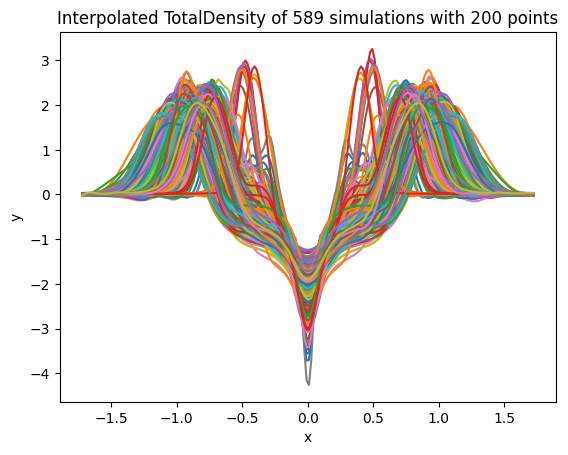

In [8]:
i = 0
for index in TD_x_df.columns:
    plt.plot(TD_x_df[index],TD_y_df[index])
    i = i + 1
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of ' + str(i) + ' simulations with 200 points')
plt.show()

In [19]:
FF_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.513892,-0.299718,-0.477219,0.087297,-0.142115,0.840006,-0.459976,-0.427894,0.672328,-0.105556
1,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.514353,-0.299953,-0.477644,0.086667,-0.142717,0.839384,-0.460461,-0.428323,0.671703,-0.105924
2,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.515734,-0.300657,-0.478919,0.084776,-0.144520,0.837520,-0.461915,-0.429612,0.669829,-0.107030
3,0.974512,-0.448282,0.182466,-0.051454,-0.359351,-0.587644,-0.180870,-0.313086,-0.354698,0.263851,...,-0.518037,-0.301829,-0.481043,0.081625,-0.147525,0.834413,-0.464338,-0.431758,0.666705,-0.108872
4,0.969687,-0.451412,0.179127,-0.054255,-0.362964,-0.590472,-0.178453,-0.316257,-0.358928,0.260830,...,-0.521258,-0.303470,-0.484016,0.077216,-0.151730,0.830066,-0.467729,-0.434762,0.662335,-0.111451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.637919,-0.763000,-0.775248,-0.745377,-0.664294,-0.757084,-0.752626,-0.656961,-0.656225,-0.777161,...,-0.857844,-0.764482,-0.705293,-0.861659,-0.689449,-0.738946,-0.677948,-0.761120,-0.640692,-0.750145
996,-0.637355,-0.762537,-0.774302,-0.744959,-0.665308,-0.758153,-0.751415,-0.656542,-0.659345,-0.777468,...,-0.857907,-0.765611,-0.704952,-0.862931,-0.690513,-0.738721,-0.677956,-0.760901,-0.640672,-0.749707
997,-0.636854,-0.762078,-0.773360,-0.744537,-0.666345,-0.759220,-0.750233,-0.656158,-0.662494,-0.777772,...,-0.857928,-0.766756,-0.704615,-0.864157,-0.691557,-0.738505,-0.678050,-0.760640,-0.640653,-0.749303
998,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.857907,-0.767919,-0.704282,-0.865337,-0.692583,-0.738300,-0.678230,-0.760337,-0.640635,-0.748932


In [40]:
FF_inc_df = pd.DataFrame(index=range(2000),columns=FF_df.columns)

for column in FF_df.columns:
    values = []
    increment = 0
    for value in FF_df[column]:
        values.append(value)
        values.append(increment)
        increment = increment + 0.001
    
    FF_inc_df[column] = values
    
FF_inc_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.513892,-0.299718,-0.477219,0.087297,-0.142115,0.840006,-0.459976,-0.427894,0.672328,-0.105556
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.514353,-0.299953,-0.477644,0.086667,-0.142717,0.839384,-0.460461,-0.428323,0.671703,-0.105924
3,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
4,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.515734,-0.300657,-0.478919,0.084776,-0.144520,0.837520,-0.461915,-0.429612,0.669829,-0.107030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,...,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000
1996,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.857907,-0.767919,-0.704282,-0.865337,-0.692583,-0.738300,-0.678230,-0.760337,-0.640635,-0.748932
1997,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,...,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000
1998,-0.636038,-0.761180,-0.771495,-0.743684,-0.668483,-0.761346,-0.747956,-0.655498,-0.668877,-0.778360,...,-0.857847,-0.769097,-0.703954,-0.866470,-0.693590,-0.738105,-0.678494,-0.759994,-0.640617,-0.748596


In [30]:
def loss(actual,prediction):
    length = int(len(prediction[0])/2)
    
    index = 0
    distance_average_sum = 0
    for data in prediction:
        p_x = data[0:length]
        p_y = data[length:]
        t_x = actual[index][0:length]
        t_y = actual[index][length:]
         
        distance_sum = 0
        for i in range(0,length):
            distance_sum = distance_sum + math.sqrt((t_x[i]-p_x[i])**2 + (t_y[i]-p_y[i])**2)
            
        distance_average_sum = distance_average_sum + distance_sum/length
        index = index + 1
        
    return (distance_average_sum)/len(prediction)

def plots(actual,prediction):
    random.seed(42)
    train = random.sample(range(0,len(test_input_values)),10)
    for number in train:
        length = int(len(prediction[0])/2)
        x_1 = prediction[number][0:length]
        y_1 = prediction[number][length:]
        plt.plot(x_1,y_1,c='b')

        x_2 = test_output_values[number][0:length]
        y_2 = test_output_values[number][length:]
        plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of the ten random predictions |blue| against actual |red|')
    plt.show() 
    
    index = 0
    for points in prediction:
        p_x = points[0:length]
        p_y = points[length:]
        plt.scatter(p_x,p_y,c='b', label='Prediction', alpha=0.25)
        t_x = test_output_values[index][0:length].tolist()
        t_y = test_output_values[index][length:].tolist()
        plt.scatter(t_x,t_y,c='r', label = 'Actual', alpha=0.50)
        index = index + 1

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output scatterplot of prediction |blue| and actual |red| data')
    plt.show()
    
    number = 10
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show() 
    
    number = 75
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show() 
    
    number = 80
    prediction = model.predict(test_input_values)
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show()
    
def training_loss(true, pred):
    row_length = int(tf.shape(true)[1]/2)
    column_length = int(tf.shape(true)[0])
    
    p_x = tf.cast(pred[:, 0:row_length], tf.float32)
    p_y = tf.cast(pred[:, row_length:], tf.float32)
    t_x = tf.cast(true[:, 0:row_length], tf.float32)
    t_y = tf.cast(true[:, row_length:], tf.float32)
    
    distance_squared = (t_x - p_x)**2 + (t_y - p_y)**2
    distance = tf.sqrt(distance_squared)
    distance_sum = tf.reduce_sum(distance, axis=-1)
    distance_average = tf.reduce_mean(distance_sum)

In [33]:
names = []
for i in TD_x_df.columns:
    names.append(str(i) + 'x')
    names.append(str(i) + 'y')

TD_df = pd.DataFrame(index=range(200),columns=[names])

for i in TD_x_df.columns:
    x_value = []
    y_value = []
    for value in TD_x_df[i]:
        x_value.append(value)
    for value in TD_y_df[i]:
        y_value.append(value)
    
    TD_df[str(i) + 'x'] = x_value
    TD_df[str(i) + 'y'] = y_value
    
TD_df

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,608x,608y,609x,609y,610x,610y,611x,611y,612x,612y
0,-1.719098,0.000033,-1.719098,0.010057,-1.719098,0.002887,-1.719098,0.009233,-1.719098,-0.005313,...,-1.719098,0.001498,-1.719098,0.008311,-1.719098,-0.003606,-1.719098,-0.000929,-1.719098,-0.030157
1,-1.701821,0.005281,-1.701821,0.005045,-1.701821,0.002097,-1.701821,0.002070,-1.701821,0.003170,...,-1.701821,0.001285,-1.701821,0.019183,-1.701821,0.001995,-1.701821,0.001921,-1.701821,0.012406
2,-1.684543,0.007669,-1.684543,-0.000403,-1.684543,0.001040,-1.684543,-0.001849,-1.684543,0.006195,...,-1.684543,0.000929,-1.684543,0.016279,-1.684543,0.004938,-1.684543,0.003077,-1.684543,0.036242
3,-1.667266,0.008989,-1.667266,-0.003850,-1.667266,0.000266,-1.667266,-0.003323,-1.667266,0.006168,...,-1.667266,0.000802,-1.667266,0.009266,-1.667266,0.006368,-1.667266,0.003261,-1.667266,0.045904
4,-1.649989,0.009950,-1.649989,-0.004699,-1.649989,-0.000087,-1.649989,-0.003178,-1.649989,0.004777,...,-1.649989,0.000999,-1.649989,0.003950,-1.649989,0.006804,-1.649989,0.003007,-1.649989,0.045806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.649989,0.008359,1.649989,-0.004231,1.649989,0.001067,1.649989,-0.003170,1.649989,0.003185,...,1.649989,0.000340,1.649989,0.021663,1.649989,0.004075,1.649989,0.002616,1.649989,0.029559
196,1.667266,0.007649,1.667266,-0.002702,1.667266,0.002124,1.667266,-0.003536,1.667266,0.004131,...,1.667266,0.000688,1.667266,0.021436,1.667266,-0.002769,1.667266,0.003015,1.667266,0.033099
197,1.684543,0.006775,1.684543,-0.001992,1.684543,0.002720,1.684543,-0.004670,1.684543,0.005269,...,1.684543,0.000980,1.684543,0.017806,1.684543,-0.007580,1.684543,0.003085,1.684543,0.035655
198,1.701821,0.004961,1.701821,-0.003726,1.701821,0.001607,1.701821,-0.006792,1.701821,0.005848,...,1.701821,0.000703,1.701821,0.008904,1.701821,-0.006880,1.701821,0.002310,1.701821,0.035493


In [41]:
input_data = FF_inc_df.iloc[: , :-14]
output_data = TD_df.iloc[: , :-28]

In [42]:
input_data

,0,1,2,3,4,5,6,7,8,9,...,589,590,591,592,593,594,595,596,597,598
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.537854,-0.345675,-0.635462,-0.711578,0.048040,-0.321485,0.954038,-0.671184,-0.170736,-0.112200
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.538258,-0.346067,-0.635859,-0.711196,0.047498,-0.321904,0.953268,-0.671651,-0.171363,-0.112708
3,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
4,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.539469,-0.347245,-0.637050,-0.710050,0.045873,-0.323160,0.950959,-0.673053,-0.173246,-0.114231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,...,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000,0.997000
1996,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.750920,-0.707582,-0.753362,-0.764456,-0.703852,-0.682471,-0.733076,-0.656056,-0.754297,-0.791761
1997,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,...,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000,0.998000
1998,-0.636038,-0.761180,-0.771495,-0.743684,-0.668483,-0.761346,-0.747956,-0.655498,-0.668877,-0.778360,...,-0.751785,-0.707882,-0.752184,-0.763395,-0.706190,-0.682455,-0.739337,-0.656257,-0.756037,-0.791562


In [36]:
output_data

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,594x,594y,595x,595y,596x,596y,597x,597y,598x,598y
0,-1.719098,0.000033,-1.719098,0.010057,-1.719098,0.002887,-1.719098,0.009233,-1.719098,-0.005313,...,-1.719098,0.001656,-1.719098,0.002309,-1.719098,0.023953,-1.719098,-0.001095,-1.719098,-0.004178
1,-1.701821,0.005281,-1.701821,0.005045,-1.701821,0.002097,-1.701821,0.002070,-1.701821,0.003170,...,-1.701821,0.001930,-1.701821,-0.000298,-1.701821,0.003527,-1.701821,0.015405,-1.701821,0.001227
2,-1.684543,0.007669,-1.684543,-0.000403,-1.684543,0.001040,-1.684543,-0.001849,-1.684543,0.006195,...,-1.684543,0.002149,-1.684543,-0.001642,-1.684543,-0.003363,-1.684543,0.018987,-1.684543,0.005227
3,-1.667266,0.008989,-1.667266,-0.003850,-1.667266,0.000266,-1.667266,-0.003323,-1.667266,0.006168,...,-1.667266,0.002471,-1.667266,-0.001039,-1.667266,-0.002395,-1.667266,0.016628,-1.667266,0.008996
4,-1.649989,0.009950,-1.649989,-0.004699,-1.649989,-0.000087,-1.649989,-0.003178,-1.649989,0.004777,...,-1.649989,0.002964,-1.649989,0.000178,-1.649989,0.001765,-1.649989,0.012804,-1.649989,0.013212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.649989,0.008359,1.649989,-0.004231,1.649989,0.001067,1.649989,-0.003170,1.649989,0.003185,...,1.649989,0.003993,1.649989,-0.006405,1.649989,0.008122,1.649989,0.021414,1.649989,0.009899
196,1.667266,0.007649,1.667266,-0.002702,1.667266,0.002124,1.667266,-0.003536,1.667266,0.004131,...,1.667266,0.003323,1.667266,-0.006060,1.667266,0.006626,1.667266,0.019341,1.667266,0.006148
197,1.684543,0.006775,1.684543,-0.001992,1.684543,0.002720,1.684543,-0.004670,1.684543,0.005269,...,1.684543,0.002365,1.684543,-0.001278,1.684543,0.001608,1.684543,0.014593,1.684543,0.004102
198,1.701821,0.004961,1.701821,-0.003726,1.701821,0.001607,1.701821,-0.006792,1.701821,0.005848,...,1.701821,0.000867,1.701821,0.003667,1.701821,-0.008243,1.701821,0.008029,1.701821,0.003770


In [43]:
column_index = []
for i in input_data.columns:
    column_index.append(i)

random.seed(42)
train = random.sample(column_index,460)
test = []
for number in column_index:
    if not number in train:
        test.append(number)

print(train)
print(test)

[125, 28, 296, 264, 240, 153, 114, 581, 99, 454, 38, 35, 105, 235, 250, 539, 30, 214, 451, 237, 481, 299, 6, 174, 589, 367, 576, 170, 232, 362, 592, 104, 409, 109, 386, 371, 285, 51, 492, 138, 407, 90, 317, 390, 207, 79, 53, 245, 313, 91, 584, 113, 565, 571, 486, 393, 177, 399, 382, 226, 288, 81, 186, 595, 93, 248, 205, 149, 528, 495, 344, 562, 300, 123, 369, 540, 453, 413, 417, 31, 128, 442, 18, 434, 172, 216, 148, 39, 119, 489, 504, 306, 470, 563, 512, 508, 352, 269, 213, 474, 490, 346, 246, 535, 146, 552, 137, 401, 302, 290, 145, 402, 316, 231, 577, 315, 215, 196, 523, 77, 274, 266, 550, 406, 27, 462, 63, 87, 338, 547, 426, 572, 228, 322, 588, 208, 206, 463, 251, 561, 139, 298, 5, 465, 389, 65, 368, 289, 404, 147, 519, 345, 185, 64, 161, 234, 556, 244, 1, 452, 388, 542, 270, 410, 101, 273, 61, 337, 163, 526, 431, 328, 111, 469, 202, 433, 92, 291, 286, 0, 323, 176, 533, 9, 443, 479, 168, 133, 33, 134, 505, 47, 50, 394, 262, 41, 287, 71, 72, 355, 256, 596, 94, 559, 457, 327, 464, 501,

In [44]:
train_input_values = []
for number in train:
    train_input_values.append(input_data[number])
    
train_output_values = []
for number in train:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    train_output_values.append(np.concatenate((list_1,list_2)))

test_input_values = []
for number in test:
    test_input_values.append(input_data[number])
    
test_output_values = []
for number in test:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    test_output_values.append(np.concatenate((list_1,list_2)))
    
train_input_values = np.array(train_input_values).astype(np.float32)
train_output_values = np.array(train_output_values).astype(np.float32)
test_input_values = np.array(test_input_values).astype(np.float32)
test_output_values = np.array(test_output_values).astype(np.float32)

print(train_input_values.shape)
print(train_output_values.shape)
print(test_input_values.shape)
print(test_output_values.shape)

(460, 2000)
(460, 400, 1)
(115, 2000)
(115, 400, 1)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense (Dense)               (None, 2000)              4002000   
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_1 (Dropout)         (None, 2000)              0         
                                                                 
 dense_2 (Dense)             (None, 400)               800400    
                                                                 
Total params: 8,804,400
Trainable params: 8,804,400
Non-train

8/8 [==============================] - 1s 125ms/step - loss: 0.1177 - val_loss: 0.1536
Epoch 71/1500
8/8 [==============================] - 2s 306ms/step - loss: 0.1150 - val_loss: 0.1749
Epoch 72/1500
8/8 [==============================] - 1s 131ms/step - loss: 0.1117 - val_loss: 0.1687
Epoch 73/1500
8/8 [==============================] - 1s 124ms/step - loss: 0.1119 - val_loss: 0.1578
Epoch 74/1500
8/8 [==============================] - 1s 122ms/step - loss: 0.1142 - val_loss: 0.1691
Epoch 75/1500
8/8 [==============================] - 1s 122ms/step - loss: 0.1111 - val_loss: 0.1590
Epoch 76/1500
8/8 [==============================] - 1s 121ms/step - loss: 0.1137 - val_loss: 0.1472
Epoch 77/1500
8/8 [==============================] - 1s 126ms/step - loss: 0.1128 - val_loss: 0.1576
Epoch 78/1500
8/8 [==============================] - 1s 123ms/step - loss: 0.1140 - val_loss: 0.1626
Epoch 79/1500
8/8 [==============================] - 1s 125ms/step - loss: 0.1189 - val_loss: 0.1864
Epoc

Epoch 151/1500
8/8 [==============================] - 2s 334ms/step - loss: 0.1029 - val_loss: 0.1163
Epoch 152/1500
8/8 [==============================] - 1s 137ms/step - loss: 0.1040 - val_loss: 0.1166
Epoch 153/1500
8/8 [==============================] - 1s 129ms/step - loss: 0.1030 - val_loss: 0.1133
Epoch 154/1500
8/8 [==============================] - 1s 135ms/step - loss: 0.1043 - val_loss: 0.1158
Epoch 155/1500
8/8 [==============================] - 1s 124ms/step - loss: 0.1066 - val_loss: 0.1161
Epoch 156/1500
8/8 [==============================] - 1s 131ms/step - loss: 0.1055 - val_loss: 0.1172
Epoch 157/1500
8/8 [==============================] - 1s 126ms/step - loss: 0.1056 - val_loss: 0.1114
Epoch 158/1500
8/8 [==============================] - 1s 126ms/step - loss: 0.1053 - val_loss: 0.1175
Epoch 159/1500
8/8 [==============================] - 1s 123ms/step - loss: 0.1093 - val_loss: 0.1146
Epoch 160/1500
8/8 [==============================] - 1s 124ms/step - loss: 0.1090

8/8 [==============================] - 2s 339ms/step - loss: 0.1028 - val_loss: 0.1163
Epoch 232/1500
8/8 [==============================] - 1s 138ms/step - loss: 0.1008 - val_loss: 0.1190
Epoch 233/1500
8/8 [==============================] - 1s 134ms/step - loss: 0.1041 - val_loss: 0.1177
Epoch 234/1500
8/8 [==============================] - 1s 129ms/step - loss: 0.0993 - val_loss: 0.1160
Epoch 235/1500
8/8 [==============================] - 1s 125ms/step - loss: 0.1026 - val_loss: 0.1190
Epoch 236/1500
8/8 [==============================] - 1s 126ms/step - loss: 0.1038 - val_loss: 0.1216
Epoch 237/1500
8/8 [==============================] - 1s 127ms/step - loss: 0.1058 - val_loss: 0.1179
Epoch 238/1500
8/8 [==============================] - 1s 123ms/step - loss: 0.1031 - val_loss: 0.1140
Epoch 239/1500
8/8 [==============================] - 1s 127ms/step - loss: 0.1052 - val_loss: 0.1179
Epoch 240/1500
8/8 [==============================] - 1s 123ms/step - loss: 0.1048 - val_loss: 0.

8/8 [==============================] - 2s 286ms/step - loss: 0.1080 - val_loss: 0.1197
Epoch 312/1500
8/8 [==============================] - 1s 137ms/step - loss: 0.1061 - val_loss: 0.1134
Epoch 313/1500
8/8 [==============================] - 1s 127ms/step - loss: 0.1052 - val_loss: 0.1155
Epoch 314/1500
8/8 [==============================] - 1s 123ms/step - loss: 0.1046 - val_loss: 0.1195
Epoch 315/1500
8/8 [==============================] - 1s 122ms/step - loss: 0.1063 - val_loss: 0.1196
Epoch 316/1500
8/8 [==============================] - 1s 121ms/step - loss: 0.1099 - val_loss: 0.1196
Epoch 317/1500
8/8 [==============================] - 1s 122ms/step - loss: 0.1107 - val_loss: 0.1202
Epoch 318/1500
8/8 [==============================] - 1s 125ms/step - loss: 0.1057 - val_loss: 0.1159
Epoch 319/1500
8/8 [==============================] - 1s 124ms/step - loss: 0.1041 - val_loss: 0.1201
Epoch 320/1500
8/8 [==============================] - 1s 123ms/step - loss: 0.1051 - val_loss: 0.

8/8 [==============================] - 2s 337ms/step - loss: 0.1044 - val_loss: 0.1158
Epoch 392/1500
8/8 [==============================] - 1s 124ms/step - loss: 0.0983 - val_loss: 0.1150
Epoch 393/1500
8/8 [==============================] - 1s 127ms/step - loss: 0.1042 - val_loss: 0.1170
Epoch 394/1500
8/8 [==============================] - 1s 124ms/step - loss: 0.1028 - val_loss: 0.1143
Epoch 395/1500
8/8 [==============================] - 1s 124ms/step - loss: 0.1011 - val_loss: 0.1139
Epoch 396/1500
8/8 [==============================] - 1s 128ms/step - loss: 0.1040 - val_loss: 0.1205
Epoch 397/1500
8/8 [==============================] - 1s 125ms/step - loss: 0.1048 - val_loss: 0.1166
Epoch 398/1500
8/8 [==============================] - 1s 124ms/step - loss: 0.1045 - val_loss: 0.1187
Epoch 399/1500
8/8 [==============================] - 1s 121ms/step - loss: 0.1032 - val_loss: 0.1208
Epoch 400/1500
8/8 [==============================] - 1s 125ms/step - loss: 0.1039 - val_loss: 0.

8/8 [==============================] - 2s 311ms/step - loss: 0.0988 - val_loss: 0.1101
Epoch 472/1500
8/8 [==============================] - 1s 133ms/step - loss: 0.1036 - val_loss: 0.1137
Epoch 473/1500
8/8 [==============================] - 1s 123ms/step - loss: 0.0991 - val_loss: 0.1145
Epoch 474/1500
8/8 [==============================] - 1s 126ms/step - loss: 0.0994 - val_loss: 0.1145
Epoch 475/1500
8/8 [==============================] - 1s 126ms/step - loss: 0.0968 - val_loss: 0.1148
Epoch 476/1500
8/8 [==============================] - 1s 125ms/step - loss: 0.0991 - val_loss: 0.1124
Epoch 477/1500
8/8 [==============================] - 1s 123ms/step - loss: 0.1013 - val_loss: 0.1168
Epoch 478/1500
8/8 [==============================] - 2s 253ms/step - loss: 0.0997 - val_loss: 0.1110
Epoch 479/1500
8/8 [==============================] - 1s 126ms/step - loss: 0.0969 - val_loss: 0.1139
Epoch 480/1500
8/8 [==============================] - 1s 127ms/step - loss: 0.0989 - val_loss: 0.

8/8 [==============================] - 2s 306ms/step - loss: 0.0966 - val_loss: 0.1187
Epoch 552/1500
8/8 [==============================] - 1s 130ms/step - loss: 0.0952 - val_loss: 0.1168
Epoch 553/1500
8/8 [==============================] - 1s 127ms/step - loss: 0.1007 - val_loss: 0.1133
Epoch 554/1500
8/8 [==============================] - 1s 124ms/step - loss: 0.0987 - val_loss: 0.1143
Epoch 555/1500
8/8 [==============================] - 1s 128ms/step - loss: 0.0998 - val_loss: 0.1163
Epoch 556/1500
8/8 [==============================] - 1s 124ms/step - loss: 0.1011 - val_loss: 0.1134
Epoch 557/1500
8/8 [==============================] - 1s 120ms/step - loss: 0.0974 - val_loss: 0.1152
Epoch 558/1500
8/8 [==============================] - 1s 123ms/step - loss: 0.0990 - val_loss: 0.1132
Epoch 559/1500
8/8 [==============================] - 1s 121ms/step - loss: 0.0945 - val_loss: 0.1168
Epoch 560/1500
8/8 [==============================] - 1s 121ms/step - loss: 0.0960 - val_loss: 0.

8/8 [==============================] - 2s 298ms/step - loss: 0.0955 - val_loss: 0.1109
Epoch 632/1500
8/8 [==============================] - 1s 128ms/step - loss: 0.0943 - val_loss: 0.1092
Epoch 633/1500
8/8 [==============================] - 1s 126ms/step - loss: 0.0974 - val_loss: 0.1133
Epoch 634/1500
8/8 [==============================] - 1s 121ms/step - loss: 0.1013 - val_loss: 0.1144
Epoch 635/1500
8/8 [==============================] - 1s 129ms/step - loss: 0.0963 - val_loss: 0.1134
Epoch 636/1500
8/8 [==============================] - 1s 128ms/step - loss: 0.0982 - val_loss: 0.1137
Epoch 637/1500
8/8 [==============================] - 1s 125ms/step - loss: 0.0946 - val_loss: 0.1162
Epoch 638/1500
8/8 [==============================] - 1s 123ms/step - loss: 0.0991 - val_loss: 0.1121
Epoch 639/1500
8/8 [==============================] - 1s 123ms/step - loss: 0.0960 - val_loss: 0.1146
Epoch 640/1500
8/8 [==============================] - 1s 125ms/step - loss: 0.0930 - val_loss: 0.

8/8 [==============================] - 2s 304ms/step - loss: 0.0940 - val_loss: 0.1153
Epoch 712/1500
8/8 [==============================] - 1s 123ms/step - loss: 0.0986 - val_loss: 0.1146
Epoch 713/1500
8/8 [==============================] - 1s 122ms/step - loss: 0.0963 - val_loss: 0.1126
Epoch 714/1500
8/8 [==============================] - 1s 121ms/step - loss: 0.0955 - val_loss: 0.1131
Epoch 715/1500
8/8 [==============================] - 1s 124ms/step - loss: 0.1002 - val_loss: 0.1125
Epoch 716/1500
8/8 [==============================] - 1s 120ms/step - loss: 0.0995 - val_loss: 0.1151
Epoch 717/1500
8/8 [==============================] - 1s 133ms/step - loss: 0.0979 - val_loss: 0.1115
Epoch 718/1500
8/8 [==============================] - 1s 123ms/step - loss: 0.0991 - val_loss: 0.1112
Epoch 719/1500
8/8 [==============================] - 1s 119ms/step - loss: 0.0975 - val_loss: 0.1124
Epoch 720/1500
8/8 [==============================] - 1s 123ms/step - loss: 0.0974 - val_loss: 0.

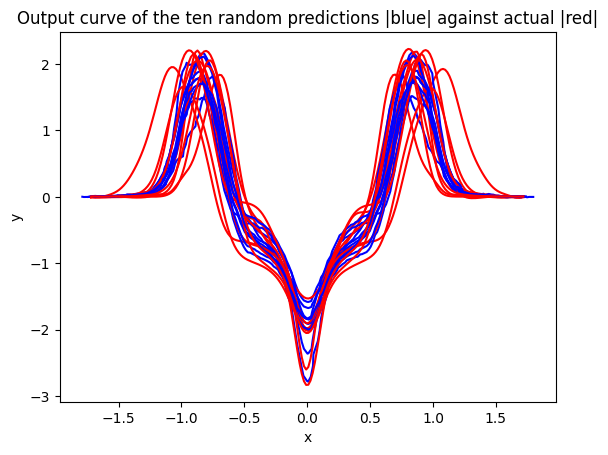

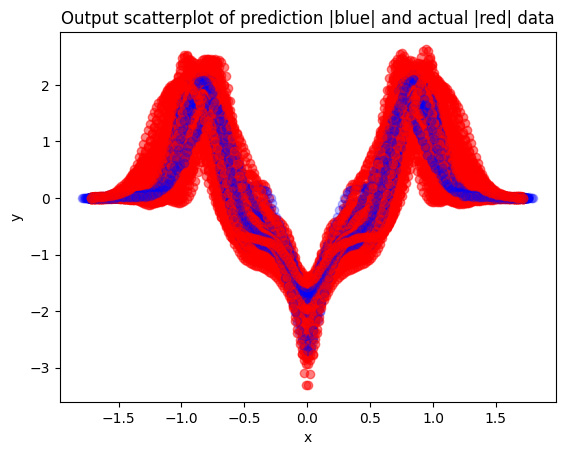

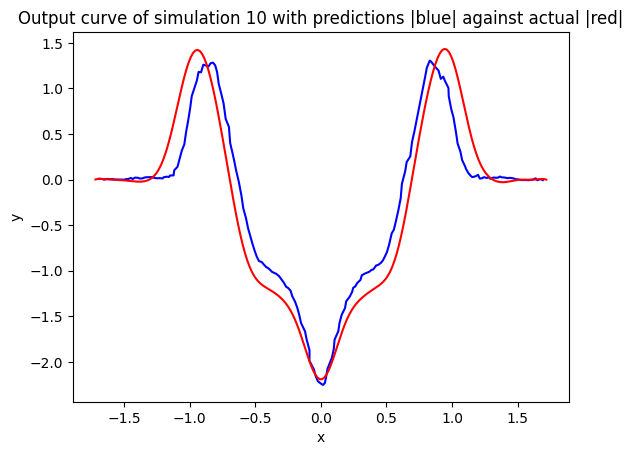

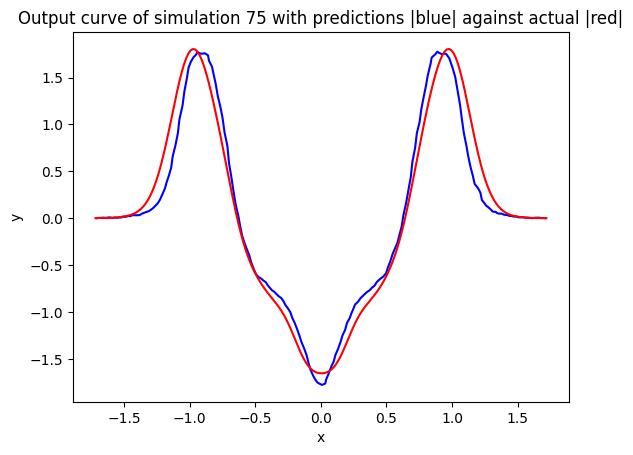

4/4 [==============================] - 0s 12ms/step


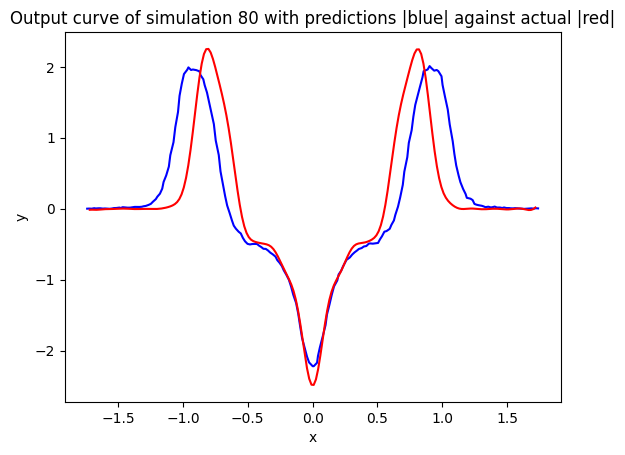

In [45]:
inputs = keras.Input(shape=(2000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=250),
             TensorBoard(log_dir='model_8_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense_3 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_2 (Dropout)         (None, 2000)              0         
                                                                 
 dense_4 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_3 (Dropout)         (None, 2000)              0         
                                                                 
 dense_5 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_4 (Dropout)         (None, 2000)              0   

Epoch 65/1500
8/8 [==============================] - 2s 238ms/step - loss: 0.1121 - val_loss: 0.1183
Epoch 66/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.1132 - val_loss: 0.1160
Epoch 67/1500
8/8 [==============================] - 2s 225ms/step - loss: 0.1119 - val_loss: 0.1209
Epoch 68/1500
8/8 [==============================] - 2s 238ms/step - loss: 0.1119 - val_loss: 0.1173
Epoch 69/1500
8/8 [==============================] - 2s 227ms/step - loss: 0.1108 - val_loss: 0.1170
Epoch 70/1500
8/8 [==============================] - 2s 238ms/step - loss: 0.1118 - val_loss: 0.1148
Epoch 71/1500
8/8 [==============================] - 4s 574ms/step - loss: 0.1125 - val_loss: 0.1180
Epoch 72/1500
8/8 [==============================] - 2s 242ms/step - loss: 0.1098 - val_loss: 0.1202
Epoch 73/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.1116 - val_loss: 0.1186
Epoch 74/1500
8/8 [==============================] - 2s 229ms/step - loss: 0.1081 - val_los

8/8 [==============================] - 3s 389ms/step - loss: 0.1036 - val_loss: 0.1186
Epoch 146/1500
8/8 [==============================] - 2s 247ms/step - loss: 0.1039 - val_loss: 0.1183
Epoch 147/1500
8/8 [==============================] - 2s 247ms/step - loss: 0.1039 - val_loss: 0.1138
Epoch 148/1500
8/8 [==============================] - 2s 243ms/step - loss: 0.1058 - val_loss: 0.1171
Epoch 149/1500
8/8 [==============================] - 2s 245ms/step - loss: 0.1041 - val_loss: 0.1160
Epoch 150/1500
8/8 [==============================] - 2s 249ms/step - loss: 0.1019 - val_loss: 0.1171
Epoch 151/1500
8/8 [==============================] - 4s 583ms/step - loss: 0.1043 - val_loss: 0.1192
Epoch 152/1500
8/8 [==============================] - 2s 242ms/step - loss: 0.1043 - val_loss: 0.1157
Epoch 153/1500
8/8 [==============================] - 2s 247ms/step - loss: 0.1052 - val_loss: 0.1183
Epoch 154/1500
8/8 [==============================] - 2s 238ms/step - loss: 0.1035 - val_loss: 0.

8/8 [==============================] - 2s 245ms/step - loss: 0.1004 - val_loss: 0.1168
Epoch 226/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.1051 - val_loss: 0.1182
Epoch 227/1500
8/8 [==============================] - 2s 238ms/step - loss: 0.1086 - val_loss: 0.1170
Epoch 228/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.1060 - val_loss: 0.1236
Epoch 229/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.1047 - val_loss: 0.1151
Epoch 230/1500
8/8 [==============================] - 2s 225ms/step - loss: 0.1024 - val_loss: 0.1173
Epoch 231/1500
8/8 [==============================] - 4s 577ms/step - loss: 0.0999 - val_loss: 0.1150
Epoch 232/1500
8/8 [==============================] - 2s 242ms/step - loss: 0.1010 - val_loss: 0.1193
Epoch 233/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.1049 - val_loss: 0.1195
Epoch 234/1500
8/8 [==============================] - 2s 237ms/step - loss: 0.1051 - val_loss: 0.

8/8 [==============================] - 2s 239ms/step - loss: 0.1015 - val_loss: 0.1132
Epoch 306/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0999 - val_loss: 0.1135
Epoch 307/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.0946 - val_loss: 0.1136
Epoch 308/1500
8/8 [==============================] - 2s 237ms/step - loss: 0.0967 - val_loss: 0.1166
Epoch 309/1500
8/8 [==============================] - 2s 227ms/step - loss: 0.0949 - val_loss: 0.1163
Epoch 310/1500
8/8 [==============================] - 2s 238ms/step - loss: 0.0984 - val_loss: 0.1211
Epoch 311/1500
8/8 [==============================] - 4s 577ms/step - loss: 0.1005 - val_loss: 0.1133
Epoch 312/1500
8/8 [==============================] - 2s 244ms/step - loss: 0.0964 - val_loss: 0.1167
Epoch 313/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0962 - val_loss: 0.1130
Epoch 314/1500
8/8 [==============================] - 3s 368ms/step - loss: 0.0931 - val_loss: 0.

8/8 [==============================] - 2s 235ms/step - loss: 0.0939 - val_loss: 0.1139
Epoch 386/1500
8/8 [==============================] - 2s 237ms/step - loss: 0.0938 - val_loss: 0.1118
Epoch 387/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0915 - val_loss: 0.1104
Epoch 388/1500
8/8 [==============================] - 2s 238ms/step - loss: 0.0964 - val_loss: 0.1188
Epoch 389/1500
8/8 [==============================] - 2s 237ms/step - loss: 0.0953 - val_loss: 0.1067
Epoch 390/1500
8/8 [==============================] - 2s 225ms/step - loss: 0.0956 - val_loss: 0.1068
Epoch 391/1500
8/8 [==============================] - 4s 569ms/step - loss: 0.0934 - val_loss: 0.1102
Epoch 392/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0914 - val_loss: 0.1092
Epoch 393/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0930 - val_loss: 0.1089
Epoch 394/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0892 - val_loss: 0.

8/8 [==============================] - 2s 245ms/step - loss: 0.0938 - val_loss: 0.1138
Epoch 466/1500
8/8 [==============================] - 2s 242ms/step - loss: 0.0902 - val_loss: 0.1119
Epoch 467/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0919 - val_loss: 0.1122
Epoch 468/1500
8/8 [==============================] - 2s 244ms/step - loss: 0.0897 - val_loss: 0.1135
Epoch 469/1500
8/8 [==============================] - 2s 243ms/step - loss: 0.0947 - val_loss: 0.1088
Epoch 470/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.0878 - val_loss: 0.1104
Epoch 471/1500
8/8 [==============================] - 4s 582ms/step - loss: 0.0896 - val_loss: 0.1133
Epoch 472/1500
8/8 [==============================] - 2s 241ms/step - loss: 0.0905 - val_loss: 0.1135
Epoch 473/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0908 - val_loss: 0.1100
Epoch 474/1500
8/8 [==============================] - 2s 226ms/step - loss: 0.0883 - val_loss: 0.

8/8 [==============================] - 2s 240ms/step - loss: 0.0919 - val_loss: 0.1123
Epoch 546/1500
8/8 [==============================] - 2s 223ms/step - loss: 0.0940 - val_loss: 0.1157
Epoch 547/1500
8/8 [==============================] - 2s 231ms/step - loss: 0.0917 - val_loss: 0.1123
Epoch 548/1500
8/8 [==============================] - 2s 232ms/step - loss: 0.0939 - val_loss: 0.1090
Epoch 549/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0944 - val_loss: 0.1097
Epoch 550/1500
8/8 [==============================] - 2s 237ms/step - loss: 0.0895 - val_loss: 0.1092
Epoch 551/1500
8/8 [==============================] - 4s 587ms/step - loss: 0.0881 - val_loss: 0.1129
Epoch 552/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0876 - val_loss: 0.1096
Epoch 553/1500
8/8 [==============================] - 2s 231ms/step - loss: 0.0889 - val_loss: 0.1119
Epoch 554/1500
8/8 [==============================] - 2s 242ms/step - loss: 0.0942 - val_loss: 0.

8/8 [==============================] - 2s 233ms/step - loss: 0.0903 - val_loss: 0.1087
Epoch 626/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.0881 - val_loss: 0.1076
Epoch 627/1500
8/8 [==============================] - 2s 233ms/step - loss: 0.0866 - val_loss: 0.1092
Epoch 628/1500
8/8 [==============================] - 2s 226ms/step - loss: 0.0896 - val_loss: 0.1078
Epoch 629/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0935 - val_loss: 0.1083
Epoch 630/1500
8/8 [==============================] - 2s 234ms/step - loss: 0.0920 - val_loss: 0.1110
Epoch 631/1500
8/8 [==============================] - 4s 579ms/step - loss: 0.0915 - val_loss: 0.1110
Epoch 632/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0866 - val_loss: 0.1088
Epoch 633/1500
8/8 [==============================] - 2s 246ms/step - loss: 0.0898 - val_loss: 0.1133
Epoch 634/1500
8/8 [==============================] - 2s 234ms/step - loss: 0.0887 - val_loss: 0.

8/8 [==============================] - 2s 233ms/step - loss: 0.0837 - val_loss: 0.1072
Epoch 706/1500
8/8 [==============================] - 2s 222ms/step - loss: 0.0816 - val_loss: 0.1064
Epoch 707/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.0838 - val_loss: 0.1113
Epoch 708/1500
8/8 [==============================] - 2s 234ms/step - loss: 0.0835 - val_loss: 0.1108
Epoch 709/1500
8/8 [==============================] - 2s 234ms/step - loss: 0.0829 - val_loss: 0.1122
Epoch 710/1500
8/8 [==============================] - 2s 234ms/step - loss: 0.0824 - val_loss: 0.1088
Epoch 711/1500
8/8 [==============================] - 4s 586ms/step - loss: 0.0838 - val_loss: 0.1089
Epoch 712/1500
8/8 [==============================] - 2s 237ms/step - loss: 0.0797 - val_loss: 0.1123
Epoch 713/1500
8/8 [==============================] - 2s 224ms/step - loss: 0.0847 - val_loss: 0.1112
Epoch 714/1500
8/8 [==============================] - 2s 234ms/step - loss: 0.0863 - val_loss: 0.

8/8 [==============================] - 2s 236ms/step - loss: 0.0820 - val_loss: 0.1114
Epoch 786/1500
8/8 [==============================] - 2s 234ms/step - loss: 0.0859 - val_loss: 0.1106
Epoch 787/1500
8/8 [==============================] - 2s 233ms/step - loss: 0.0834 - val_loss: 0.1070
Epoch 788/1500
8/8 [==============================] - 2s 224ms/step - loss: 0.0832 - val_loss: 0.1073
Epoch 789/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0836 - val_loss: 0.1078
Epoch 790/1500
8/8 [==============================] - 2s 233ms/step - loss: 0.0808 - val_loss: 0.1076
Epoch 791/1500
8/8 [==============================] - 4s 567ms/step - loss: 0.0831 - val_loss: 0.1062
Epoch 792/1500
8/8 [==============================] - 2s 227ms/step - loss: 0.0821 - val_loss: 0.1083
Epoch 793/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.0800 - val_loss: 0.1094
Epoch 794/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.0838 - val_loss: 0.

8/8 [==============================] - 2s 229ms/step - loss: 0.0927 - val_loss: 0.1056
Epoch 866/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0838 - val_loss: 0.1059
Epoch 867/1500
8/8 [==============================] - 2s 241ms/step - loss: 0.0837 - val_loss: 0.1107
Epoch 868/1500
8/8 [==============================] - 2s 269ms/step - loss: 0.0812 - val_loss: 0.1085
Epoch 869/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.0840 - val_loss: 0.1053
Epoch 870/1500
8/8 [==============================] - 2s 244ms/step - loss: 0.0847 - val_loss: 0.1075
Epoch 871/1500
8/8 [==============================] - 4s 598ms/step - loss: 0.0808 - val_loss: 0.1074
Epoch 872/1500
8/8 [==============================] - 2s 253ms/step - loss: 0.0790 - val_loss: 0.1065
Epoch 873/1500
8/8 [==============================] - 2s 241ms/step - loss: 0.0820 - val_loss: 0.1159
Epoch 874/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0816 - val_loss: 0.

8/8 [==============================] - 2s 246ms/step - loss: 0.0801 - val_loss: 0.1092
Epoch 946/1500
8/8 [==============================] - 2s 242ms/step - loss: 0.0770 - val_loss: 0.1092
Epoch 947/1500
8/8 [==============================] - 2s 233ms/step - loss: 0.0778 - val_loss: 0.1077
Epoch 948/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0804 - val_loss: 0.1070
Epoch 949/1500
8/8 [==============================] - 2s 233ms/step - loss: 0.0767 - val_loss: 0.1071
Epoch 950/1500
8/8 [==============================] - 2s 238ms/step - loss: 0.0764 - val_loss: 0.1096
Epoch 951/1500
8/8 [==============================] - 5s 621ms/step - loss: 0.0831 - val_loss: 0.1070
Epoch 952/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0832 - val_loss: 0.1072
Epoch 953/1500
8/8 [==============================] - 2s 273ms/step - loss: 0.0781 - val_loss: 0.1070
Epoch 954/1500
8/8 [==============================] - 2s 237ms/step - loss: 0.0795 - val_loss: 0.

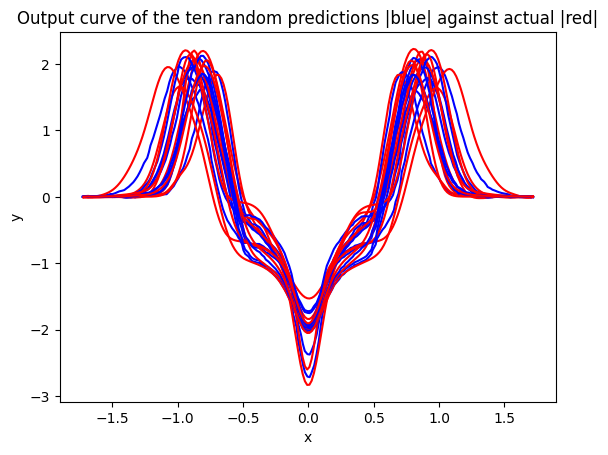

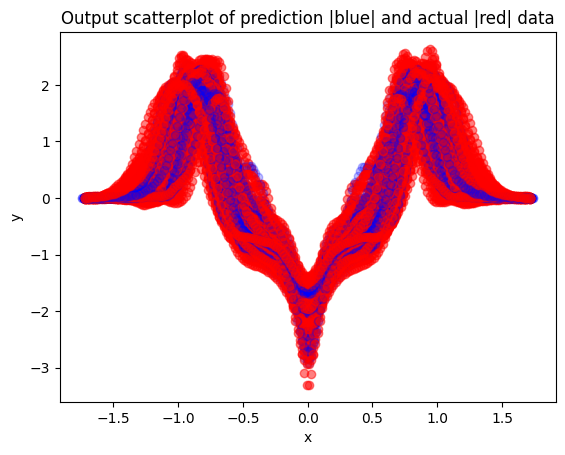

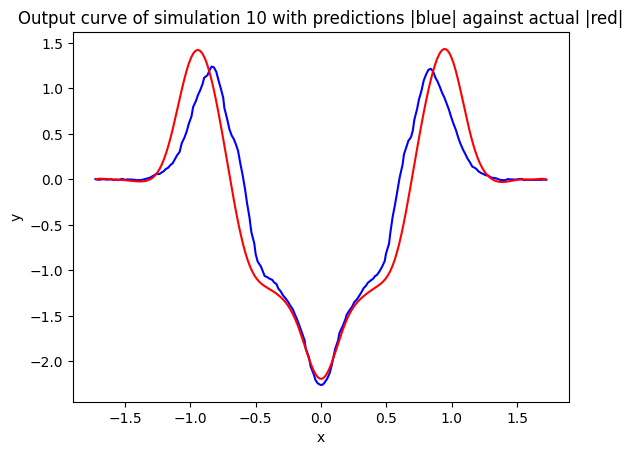

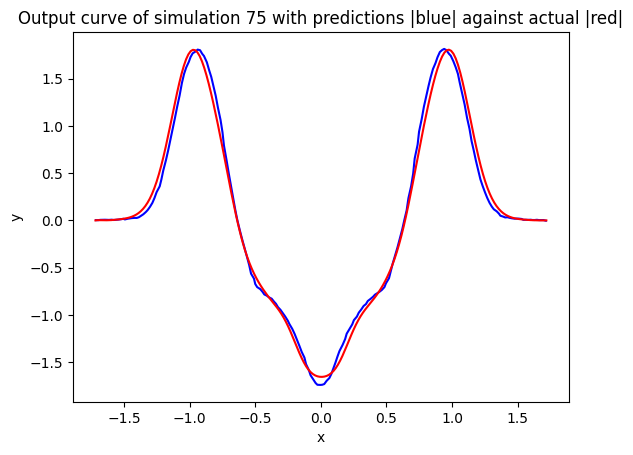

4/4 [==============================] - 0s 14ms/step


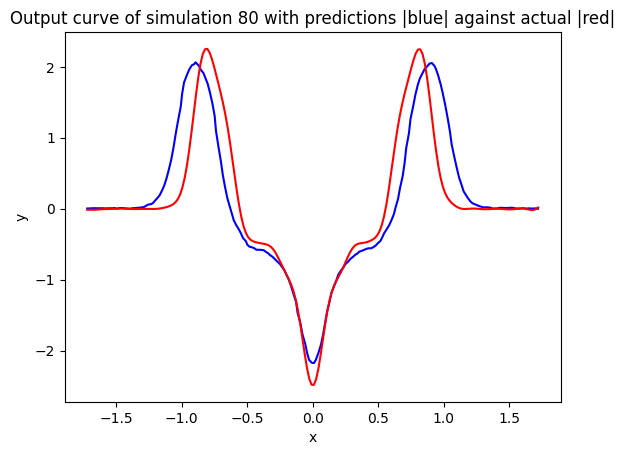

In [46]:
inputs = keras.Input(shape=(2000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.20, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=250),
             TensorBoard(log_dir='model_8_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense_8 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_6 (Dropout)         (None, 2000)              0         
                                                                 
 dense_9 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_7 (Dropout)         (None, 2000)              0         
                                                                 
 dense_10 (Dense)            (None, 2000)              4002000   
                                                                 
 dropout_8 (Dropout)         (None, 2000)              0   

Epoch 65/1500
8/8 [==============================] - 2s 241ms/step - loss: 0.1112 - val_loss: 0.1250
Epoch 66/1500
8/8 [==============================] - 2s 238ms/step - loss: 0.1133 - val_loss: 0.1286
Epoch 67/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.1102 - val_loss: 0.1299
Epoch 68/1500
8/8 [==============================] - 2s 237ms/step - loss: 0.1098 - val_loss: 0.1301
Epoch 69/1500
8/8 [==============================] - 2s 227ms/step - loss: 0.1108 - val_loss: 0.1169
Epoch 70/1500
8/8 [==============================] - 2s 246ms/step - loss: 0.1119 - val_loss: 0.1335
Epoch 71/1500
8/8 [==============================] - 4s 583ms/step - loss: 0.1106 - val_loss: 0.1327
Epoch 72/1500
8/8 [==============================] - 2s 244ms/step - loss: 0.1104 - val_loss: 0.1268
Epoch 73/1500
8/8 [==============================] - 2s 244ms/step - loss: 0.1077 - val_loss: 0.1244
Epoch 74/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.1058 - val_los

8/8 [==============================] - 2s 270ms/step - loss: 0.0904 - val_loss: 0.1100
Epoch 146/1500
8/8 [==============================] - 2s 266ms/step - loss: 0.0884 - val_loss: 0.1084
Epoch 147/1500
8/8 [==============================] - 2s 251ms/step - loss: 0.0895 - val_loss: 0.1103
Epoch 148/1500
8/8 [==============================] - 2s 254ms/step - loss: 0.0893 - val_loss: 0.1092
Epoch 149/1500
8/8 [==============================] - 2s 256ms/step - loss: 0.0907 - val_loss: 0.1097
Epoch 150/1500
8/8 [==============================] - 2s 234ms/step - loss: 0.0893 - val_loss: 0.1112
Epoch 151/1500
8/8 [==============================] - 5s 664ms/step - loss: 0.0881 - val_loss: 0.1053
Epoch 152/1500
8/8 [==============================] - 2s 293ms/step - loss: 0.0894 - val_loss: 0.1055
Epoch 153/1500
8/8 [==============================] - 3s 430ms/step - loss: 0.0857 - val_loss: 0.1051
Epoch 154/1500
8/8 [==============================] - 2s 246ms/step - loss: 0.0857 - val_loss: 0.

8/8 [==============================] - 2s 247ms/step - loss: 0.0809 - val_loss: 0.1026
Epoch 226/1500
8/8 [==============================] - 2s 252ms/step - loss: 0.0813 - val_loss: 0.1071
Epoch 227/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0813 - val_loss: 0.1074
Epoch 228/1500
8/8 [==============================] - 2s 262ms/step - loss: 0.0813 - val_loss: 0.1086
Epoch 229/1500
8/8 [==============================] - 2s 244ms/step - loss: 0.0826 - val_loss: 0.1074
Epoch 230/1500
8/8 [==============================] - 2s 226ms/step - loss: 0.0799 - val_loss: 0.1074
Epoch 231/1500
8/8 [==============================] - 5s 651ms/step - loss: 0.0798 - val_loss: 0.1042
Epoch 232/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0775 - val_loss: 0.1029
Epoch 233/1500
8/8 [==============================] - 2s 250ms/step - loss: 0.0773 - val_loss: 0.1011
Epoch 234/1500
8/8 [==============================] - 2s 243ms/step - loss: 0.0791 - val_loss: 0.

8/8 [==============================] - 2s 241ms/step - loss: 0.0710 - val_loss: 0.1022
Epoch 306/1500
8/8 [==============================] - 2s 297ms/step - loss: 0.0712 - val_loss: 0.0977
Epoch 307/1500
8/8 [==============================] - 2s 287ms/step - loss: 0.0695 - val_loss: 0.0992
Epoch 308/1500
8/8 [==============================] - 2s 238ms/step - loss: 0.0716 - val_loss: 0.1011
Epoch 309/1500
8/8 [==============================] - 3s 331ms/step - loss: 0.0707 - val_loss: 0.1069
Epoch 310/1500
8/8 [==============================] - 2s 244ms/step - loss: 0.0743 - val_loss: 0.1033
Epoch 311/1500
8/8 [==============================] - 5s 662ms/step - loss: 0.0722 - val_loss: 0.1005
Epoch 312/1500
8/8 [==============================] - 2s 271ms/step - loss: 0.0710 - val_loss: 0.1009
Epoch 313/1500
8/8 [==============================] - 2s 255ms/step - loss: 0.0681 - val_loss: 0.0986
Epoch 314/1500
8/8 [==============================] - 2s 261ms/step - loss: 0.0663 - val_loss: 0.

8/8 [==============================] - 2s 240ms/step - loss: 0.0639 - val_loss: 0.0954
Epoch 386/1500
8/8 [==============================] - 2s 296ms/step - loss: 0.0664 - val_loss: 0.0981
Epoch 387/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0652 - val_loss: 0.0944
Epoch 388/1500
8/8 [==============================] - 2s 252ms/step - loss: 0.0665 - val_loss: 0.0976
Epoch 389/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0635 - val_loss: 0.0978
Epoch 390/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0650 - val_loss: 0.0988
Epoch 391/1500
8/8 [==============================] - 5s 730ms/step - loss: 0.0635 - val_loss: 0.0934
Epoch 392/1500
8/8 [==============================] - 2s 245ms/step - loss: 0.0645 - val_loss: 0.0998
Epoch 393/1500
8/8 [==============================] - 2s 283ms/step - loss: 0.0646 - val_loss: 0.1005
Epoch 394/1500
8/8 [==============================] - 3s 336ms/step - loss: 0.0662 - val_loss: 0.

8/8 [==============================] - 2s 255ms/step - loss: 0.0587 - val_loss: 0.1047
Epoch 466/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0632 - val_loss: 0.0983
Epoch 467/1500
8/8 [==============================] - 2s 286ms/step - loss: 0.0623 - val_loss: 0.0992
Epoch 468/1500
8/8 [==============================] - 2s 237ms/step - loss: 0.0562 - val_loss: 0.0943
Epoch 469/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.0583 - val_loss: 0.0952
Epoch 470/1500
8/8 [==============================] - 2s 225ms/step - loss: 0.0587 - val_loss: 0.1005
Epoch 471/1500
8/8 [==============================] - 4s 568ms/step - loss: 0.0589 - val_loss: 0.0976
Epoch 472/1500
8/8 [==============================] - 2s 245ms/step - loss: 0.0556 - val_loss: 0.0941
Epoch 473/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0574 - val_loss: 0.0987
Epoch 474/1500
8/8 [==============================] - 2s 225ms/step - loss: 0.0575 - val_loss: 0.

8/8 [==============================] - 2s 235ms/step - loss: 0.0537 - val_loss: 0.0947
Epoch 546/1500
8/8 [==============================] - 2s 227ms/step - loss: 0.0531 - val_loss: 0.0930
Epoch 547/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0538 - val_loss: 0.0931
Epoch 548/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.0517 - val_loss: 0.0938
Epoch 549/1500
8/8 [==============================] - 2s 226ms/step - loss: 0.0554 - val_loss: 0.1028
Epoch 550/1500
8/8 [==============================] - 2s 241ms/step - loss: 0.0582 - val_loss: 0.0950
Epoch 551/1500
8/8 [==============================] - 4s 588ms/step - loss: 0.0603 - val_loss: 0.0965
Epoch 552/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.0586 - val_loss: 0.0982
Epoch 553/1500
8/8 [==============================] - 2s 228ms/step - loss: 0.0565 - val_loss: 0.0863
Epoch 554/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.0589 - val_loss: 0.

8/8 [==============================] - 2s 249ms/step - loss: 0.0484 - val_loss: 0.0956
Epoch 626/1500
8/8 [==============================] - 2s 245ms/step - loss: 0.0509 - val_loss: 0.0954
Epoch 627/1500
8/8 [==============================] - 2s 246ms/step - loss: 0.0495 - val_loss: 0.0943
Epoch 628/1500
8/8 [==============================] - 2s 247ms/step - loss: 0.0544 - val_loss: 0.0988
Epoch 629/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0541 - val_loss: 0.1048
Epoch 630/1500
8/8 [==============================] - 2s 247ms/step - loss: 0.0540 - val_loss: 0.0992
Epoch 631/1500
8/8 [==============================] - 4s 582ms/step - loss: 0.0502 - val_loss: 0.0953
Epoch 632/1500
8/8 [==============================] - 2s 258ms/step - loss: 0.0508 - val_loss: 0.0974
Epoch 633/1500
8/8 [==============================] - 2s 237ms/step - loss: 0.0537 - val_loss: 0.0989
Epoch 634/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0529 - val_loss: 0.

8/8 [==============================] - 2s 251ms/step - loss: 0.0543 - val_loss: 0.0981
Epoch 706/1500
8/8 [==============================] - 2s 238ms/step - loss: 0.0501 - val_loss: 0.0913
Epoch 707/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0496 - val_loss: 0.0929
Epoch 708/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.0493 - val_loss: 0.0928
Epoch 709/1500
8/8 [==============================] - 2s 236ms/step - loss: 0.0492 - val_loss: 0.0920
Epoch 710/1500
8/8 [==============================] - 2s 223ms/step - loss: 0.0514 - val_loss: 0.0940
Epoch 711/1500
8/8 [==============================] - 4s 580ms/step - loss: 0.0476 - val_loss: 0.0899
Epoch 712/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0508 - val_loss: 0.0948
Epoch 713/1500
8/8 [==============================] - 2s 231ms/step - loss: 0.0489 - val_loss: 0.0942
Epoch 714/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0471 - val_loss: 0.

8/8 [==============================] - 2s 234ms/step - loss: 0.0509 - val_loss: 0.0955
Epoch 786/1500
8/8 [==============================] - 2s 237ms/step - loss: 0.0494 - val_loss: 0.0961
Epoch 787/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0491 - val_loss: 0.0967
Epoch 788/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0493 - val_loss: 0.0988
Epoch 789/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0497 - val_loss: 0.0993
Epoch 790/1500
8/8 [==============================] - 2s 234ms/step - loss: 0.0516 - val_loss: 0.0958
Epoch 791/1500
8/8 [==============================] - 4s 589ms/step - loss: 0.0518 - val_loss: 0.0966
Epoch 792/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0566 - val_loss: 0.1017
Epoch 793/1500
8/8 [==============================] - 2s 267ms/step - loss: 0.0560 - val_loss: 0.0971
Epoch 794/1500
8/8 [==============================] - 2s 250ms/step - loss: 0.0563 - val_loss: 0.

8/8 [==============================] - 2s 238ms/step - loss: 0.0514 - val_loss: 0.0965
Epoch 866/1500
8/8 [==============================] - 2s 272ms/step - loss: 0.0550 - val_loss: 0.1033
Epoch 867/1500
8/8 [==============================] - 2s 328ms/step - loss: 0.0517 - val_loss: 0.0964
Epoch 868/1500
8/8 [==============================] - 2s 300ms/step - loss: 0.0498 - val_loss: 0.0984
Epoch 869/1500
8/8 [==============================] - 2s 246ms/step - loss: 0.0488 - val_loss: 0.0961
Epoch 870/1500
8/8 [==============================] - 2s 250ms/step - loss: 0.0490 - val_loss: 0.0954
Epoch 871/1500
8/8 [==============================] - 5s 656ms/step - loss: 0.0461 - val_loss: 0.0943
Epoch 872/1500
8/8 [==============================] - 3s 382ms/step - loss: 0.0463 - val_loss: 0.0968
Epoch 873/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0482 - val_loss: 0.0956
Epoch 874/1500
8/8 [==============================] - 2s 294ms/step - loss: 0.0497 - val_loss: 0.

8/8 [==============================] - 2s 239ms/step - loss: 0.0447 - val_loss: 0.0942
Epoch 946/1500
8/8 [==============================] - 2s 325ms/step - loss: 0.0430 - val_loss: 0.0920
Epoch 947/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0434 - val_loss: 0.0912
Epoch 948/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0428 - val_loss: 0.0838
Epoch 949/1500
8/8 [==============================] - 3s 368ms/step - loss: 0.0390 - val_loss: 0.0853
Epoch 950/1500
8/8 [==============================] - 2s 241ms/step - loss: 0.0404 - val_loss: 0.0879
Epoch 951/1500
8/8 [==============================] - 7s 936ms/step - loss: 0.0418 - val_loss: 0.0962
Epoch 952/1500
8/8 [==============================] - 3s 381ms/step - loss: 0.0429 - val_loss: 0.0840
Epoch 953/1500
8/8 [==============================] - 3s 400ms/step - loss: 0.0404 - val_loss: 0.0928
Epoch 954/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0443 - val_loss: 0.

8/8 [==============================] - 2s 282ms/step - loss: 0.0381 - val_loss: 0.0927
Epoch 1026/1500
8/8 [==============================] - 2s 241ms/step - loss: 0.0414 - val_loss: 0.0957
Epoch 1027/1500
8/8 [==============================] - 2s 244ms/step - loss: 0.0434 - val_loss: 0.0908
Epoch 1028/1500
8/8 [==============================] - 3s 383ms/step - loss: 0.0462 - val_loss: 0.0984
Epoch 1029/1500
8/8 [==============================] - 2s 246ms/step - loss: 0.0420 - val_loss: 0.0862
Epoch 1030/1500
8/8 [==============================] - 2s 311ms/step - loss: 0.0439 - val_loss: 0.0938
Epoch 1031/1500
8/8 [==============================] - 5s 649ms/step - loss: 0.0401 - val_loss: 0.0940
Epoch 1032/1500
8/8 [==============================] - 3s 356ms/step - loss: 0.0426 - val_loss: 0.0907
Epoch 1033/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0418 - val_loss: 0.0941
Epoch 1034/1500
8/8 [==============================] - 2s 296ms/step - loss: 0.0428 - val

8/8 [==============================] - 2s 238ms/step - loss: 0.0421 - val_loss: 0.0938
Epoch 1105/1500
8/8 [==============================] - 2s 237ms/step - loss: 0.0435 - val_loss: 0.0940
Epoch 1106/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0390 - val_loss: 0.0952
Epoch 1107/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0433 - val_loss: 0.1036
Epoch 1108/1500
8/8 [==============================] - 2s 261ms/step - loss: 0.0429 - val_loss: 0.0907
Epoch 1109/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0427 - val_loss: 0.0885
Epoch 1110/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0389 - val_loss: 0.0916
Epoch 1111/1500
8/8 [==============================] - 4s 597ms/step - loss: 0.0428 - val_loss: 0.0930
Epoch 1112/1500
8/8 [==============================] - 2s 237ms/step - loss: 0.0414 - val_loss: 0.0952
Epoch 1113/1500
8/8 [==============================] - 2s 242ms/step - loss: 0.0417 - val

8/8 [==============================] - 2s 285ms/step - loss: 0.0461 - val_loss: 0.0932
Epoch 1184/1500
8/8 [==============================] - 3s 424ms/step - loss: 0.0422 - val_loss: 0.0959
Epoch 1185/1500
8/8 [==============================] - 2s 243ms/step - loss: 0.0403 - val_loss: 0.0979
Epoch 1186/1500
8/8 [==============================] - 2s 243ms/step - loss: 0.0393 - val_loss: 0.0906
Epoch 1187/1500
8/8 [==============================] - 2s 237ms/step - loss: 0.0374 - val_loss: 0.0930
Epoch 1188/1500
8/8 [==============================] - 2s 241ms/step - loss: 0.0425 - val_loss: 0.0925
Epoch 1189/1500
8/8 [==============================] - 2s 243ms/step - loss: 0.0445 - val_loss: 0.0978
Epoch 1190/1500
8/8 [==============================] - 2s 243ms/step - loss: 0.0416 - val_loss: 0.0880
Epoch 1191/1500
8/8 [==============================] - 4s 578ms/step - loss: 0.0404 - val_loss: 0.0941
Epoch 1192/1500
8/8 [==============================] - 2s 238ms/step - loss: 0.0418 - val

8/8 [==============================] - 2s 252ms/step - loss: 0.0411 - val_loss: 0.0917
Epoch 1263/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0422 - val_loss: 0.0940
Epoch 1264/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0444 - val_loss: 0.0910
Epoch 1265/1500
8/8 [==============================] - 2s 271ms/step - loss: 0.0426 - val_loss: 0.0953
Epoch 1266/1500
8/8 [==============================] - 2s 266ms/step - loss: 0.0459 - val_loss: 0.0899
Epoch 1267/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0419 - val_loss: 0.0927
Epoch 1268/1500
8/8 [==============================] - 2s 251ms/step - loss: 0.0390 - val_loss: 0.0908
Epoch 1269/1500
8/8 [==============================] - 2s 249ms/step - loss: 0.0459 - val_loss: 0.0969
Epoch 1270/1500
8/8 [==============================] - 2s 237ms/step - loss: 0.0425 - val_loss: 0.0946
Epoch 1271/1500
8/8 [==============================] - 5s 687ms/step - loss: 0.0438 - val

8/8 [==============================] - 4s 603ms/step - loss: 0.0383 - val_loss: 0.0915
Epoch 1342/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0379 - val_loss: 0.0899
Epoch 1343/1500
8/8 [==============================] - 2s 247ms/step - loss: 0.0350 - val_loss: 0.0948
Epoch 1344/1500
8/8 [==============================] - 2s 235ms/step - loss: 0.0407 - val_loss: 0.0963
Epoch 1345/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0381 - val_loss: 0.0859
Epoch 1346/1500
8/8 [==============================] - 2s 248ms/step - loss: 0.0420 - val_loss: 0.0894
Epoch 1347/1500
8/8 [==============================] - 2s 244ms/step - loss: 0.0386 - val_loss: 0.0950
Epoch 1348/1500
8/8 [==============================] - 2s 240ms/step - loss: 0.0372 - val_loss: 0.0872
Epoch 1349/1500
8/8 [==============================] - 2s 234ms/step - loss: 0.0379 - val_loss: 0.0878
Epoch 1350/1500
8/8 [==============================] - 2s 242ms/step - loss: 0.0399 - val

8/8 [==============================] - 2s 251ms/step - loss: 0.0390 - val_loss: 0.0935
Epoch 1421/1500
8/8 [==============================] - 5s 629ms/step - loss: 0.0374 - val_loss: 0.0881
Epoch 1422/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0359 - val_loss: 0.0969
Epoch 1423/1500
8/8 [==============================] - 2s 239ms/step - loss: 0.0352 - val_loss: 0.0897
Epoch 1424/1500
8/8 [==============================] - 2s 226ms/step - loss: 0.0376 - val_loss: 0.0871
Epoch 1425/1500
8/8 [==============================] - 2s 238ms/step - loss: 0.0361 - val_loss: 0.0902
Epoch 1426/1500
8/8 [==============================] - 2s 246ms/step - loss: 0.0352 - val_loss: 0.0946
Epoch 1427/1500
8/8 [==============================] - 2s 237ms/step - loss: 0.0364 - val_loss: 0.0915
Epoch 1428/1500
8/8 [==============================] - 2s 238ms/step - loss: 0.0352 - val_loss: 0.0881
Epoch 1429/1500
8/8 [==============================] - 2s 242ms/step - loss: 0.0360 - val

8/8 [==============================] - 2s 248ms/step - loss: 0.0402 - val_loss: 0.0974
Epoch 1500/1500
8/8 [==============================] - 2s 283ms/step - loss: 0.0405 - val_loss: 0.0920

4/4 [==============================] - 0s 18ms/step
Loss is:0.15658874220413932

4/4 [==============================] - 0s 14ms/step


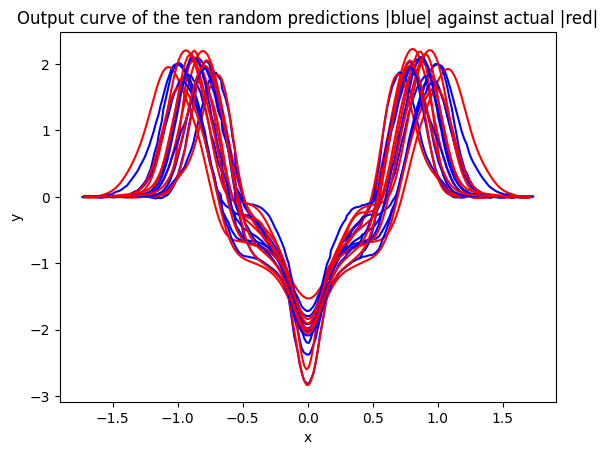

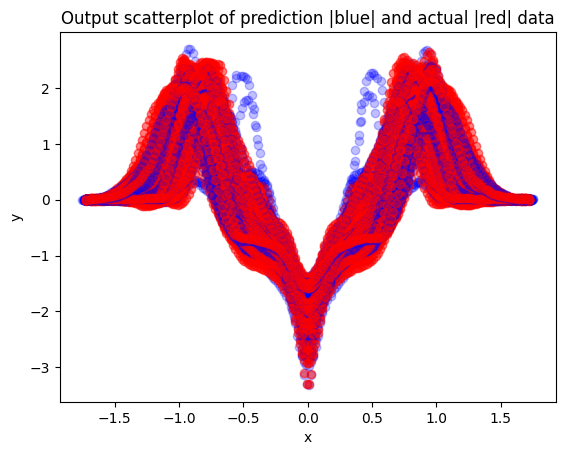

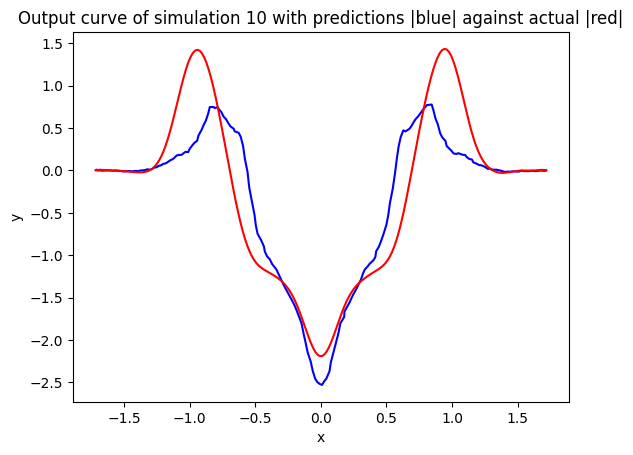

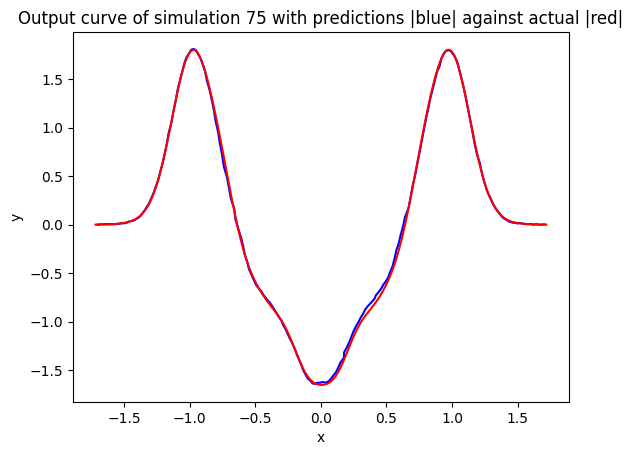

4/4 [==============================] - 0s 20ms/step


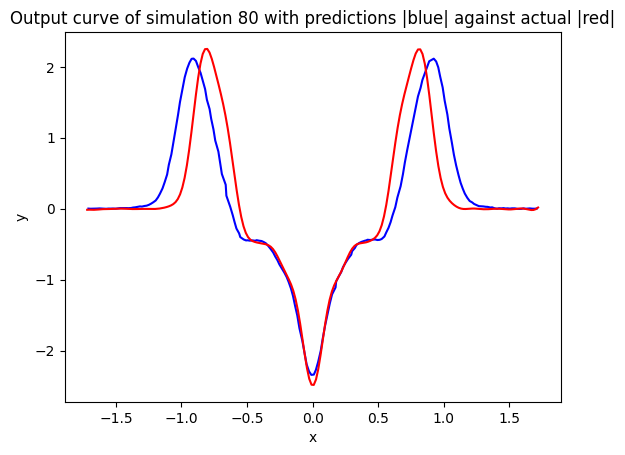

In [47]:
inputs = keras.Input(shape=(2000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=250),
             TensorBoard(log_dir='model_8_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=46, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))